In [1]:
import requests

In [2]:
url = 'https://www.naver.com'

In [3]:
response = requests.get(url)  # url 주소에 요청해서 응답온 것을 변수로 저장


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
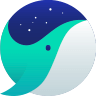
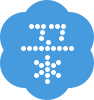

In [5]:
print(response.text)

In [6]:
html_data = response.text

In [7]:
html_data.find('네이버')

365

In [10]:
html_data[365:368]  #365번부터 367번까지 데이터

'네이버'

## beautifulsoup 라이브러리
1. html tag의 데이터를 쉽게 추출하기 위한 라이브러리
2. 웹의 구조(html문서)를 어느정도 인지를 한 상태에서 라이브러리 사용하면 쉽게 데이터 추출
3. 파서(parser)를 활용하여 파이썬에서 쉽게 객체 형태로 제공 

In [11]:
# 라이브러리 설치 
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/129.4 kB ? eta -:--:--
     -------------------------------------- 129.4/129.4 kB 7.4 MB/s eta 0:00:00
  Running setup.py install for bs4: started
  Running setup.py install for bs4: finished with status 'done'


  DEPRECATION: bs4 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from bs4 import BeautifulSoup as bs


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
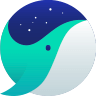
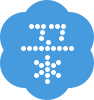

In [18]:
soup = bs(html_data, 'html.parser')
soup

- 태그의 이름을 사용하여 검색
   - 태그 : 해당 태그의 첫번째 정보를 출력
   - 태그['속성'] : 해당 태그의 첫번째 

In [19]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

<title>NAVER</title>
title
NAVER


In [36]:
print(soup.img)    # 첫번째 image를 가져온다. 


<img alt="한국경제" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/015.png"/>


In [37]:
print(soup.img['alt'])

한국경제


- find()
  - HTML 안에서 해당 태그에 대한 첫번째 정보를 출력
  - find(속성 = '값') : HTML 해당속성과 일치하는 값에 대한 첫번째 정보를 출력
- find_all()
  - HTML 안에 해당 태그에 대한 모든 정보를 리스트 형식으로 출력
  - limit 속성 : 리스트의 길이 지정

In [21]:
print(soup.find('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [22]:
print(soup.find(id = 'newsstand'))

<div class="sc_newscast" id="newsstand"> <h2 class="blind">뉴스스탠드</h2> <div class="group_issue" data-clk-prefix="ncy" id="NM_NEWSSTAND_HEADER"> <div class="issue_area"> <a class="link_media" data-clk="newsflash" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y">연합뉴스</a> <div class="list_issue" data-nm-ui="rolling" id="NM_ONELINE_ROLLING"> <div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013792156">강제징용 해법 공식발표 초읽기…정부 "협의 종료되는대로 설명"</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&amp;sid1=001&amp;sid2=140&amp;oid=001&amp;isYeonhapFlash=Y&amp;aid=0013792080">이재명 "내부 공격 중단해달라…상대 진영이 바라는 일"</a></div>
<div><a class="issue" data-clk="quickarticle" href="https://news.naver.com/main/list.naver?mode=LPOD&amp;mid=sec&

In [23]:
print(soup.find_all('span'))

[<span>뉴스스탠드 바로가기</span>, <span>주제별캐스트 바로가기</span>, <span>타임스퀘어 바로가기</span>, <span>쇼핑캐스트 바로가기</span>, <span>로그인 바로가기</span>, <span class="_1syGnXOL _3VkgqBXB" data-clk="dropbanner1b" style="padding-right: 20px; font-size: 17px; color: black"><span>매일 쓰는 브라우저 보안이 걱정된다면, </span><strong>안전하고 빠른 최신 브라우저 웨일로 업데이트 하세요.</strong></span>, <span>매일 쓰는 브라우저 보안이 걱정된다면, </span>, <span style="background-color: #0436c7">다운로드</span>, <span class="blind">네이버</span>, <span class="blind">쥬니어네이버</span>, <span class="blind">해피빈</span>, <span class="blind">검색</span>, <span class="ico_search_submit"></span>, <span class="blind">한글 입력기</span>, <span class="ico_keyboard"></span>, <span class="blind">자동완성 레이어</span>, <span class="ico_arr"></span>, <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>, <span class="common_ico_kwd"><i class="imsc ico_search"></i></span>, <span>@txt@</span>, <span class="etc">
<em class="date">@date@.</em>
<!-- [AU] _del 클래스

In [24]:
print(soup.find_all('span')[2])

<span>타임스퀘어 바로가기</span>


In [31]:
sample = soup.find('div', attrs={
    'class': 'list_theme_wrap'
})
sample

<div class="list_theme_wrap">
<ul class="list_theme">
<li class="theme_item" data-da-position="true" data-gdid="C3S_RANKING_https://post.naver.com/viewer/postView.naver?memberNo=49797427&amp;volumeNo=35554940">
<a class="theme_thumb" data-clk="tcc_fin.list1cont1" href="https://post.naver.com/viewer/postView.naver?memberNo=49797427&amp;volumeNo=35554940" target="_blank">
<img alt="은마 아파트 주인들 “새 집 받으려면 수억을 더 내라고요?”" data-src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fpost.phinf%2FMjAyMzAzMDFfMTUw%2FMDAxNjc3NjYyNTIyMDg1.8zHtfLhKNOwBm-IksPgGdMD3aziE0LTfbxpgh-y9nG4g.LQ-whsoJag18AnOaxyvPfp-khS_QPZy7_HpnZ0OTYg4g.JPEG%2FIG_XtoqY9lkATYZkTVHlTnFbSiy8.jpg%3Ftype%3Df339_222_q90%22&amp;type=nf340_228" height="114" onerror="this.outerHTML='&lt;span class=\'pm_noimg\'&gt;&lt;span class=\'noimg_text\'&gt;이미지 준비중&lt;/span&gt;&lt;/span&gt;'" src="https://s.pstatic.net/dthumb.phinf/?src=%22https%3A%2F%2Fs.pstatic.net%2Fpost.phinf%2FMjAyMzAzMDFfMTUw%2FMDAxNjc3NjYyNTIyMDg1.8z

In [33]:
sample_list = sample.find_all('strong')
sample_list

[<strong class="title elss">은마 아파트 주인들 “새 집 받으려면 수억을 더 내라고요?”</strong>,
 <strong class="title elss">'고딩 재벌' 정동원, 입학식서 OO원 시계 '눈길'</strong>,
 <strong class="title elss">동대문구 지도를 바꾼다, 이문·휘경뉴타운의 가치는</strong>,
 <strong class="title elss">서울 천호·상계동 모아주택 심의 통과</strong>,
 <strong class="title elss">“25년된 아파트에 73명이나”…불 붙는 수도권 경매</strong>]

In [34]:
for i in sample_list:
    print(i)

<strong class="title elss">은마 아파트 주인들 “새 집 받으려면 수억을 더 내라고요?”</strong>
<strong class="title elss">'고딩 재벌' 정동원, 입학식서 OO원 시계 '눈길'</strong>
<strong class="title elss">동대문구 지도를 바꾼다, 이문·휘경뉴타운의 가치는</strong>
<strong class="title elss">서울 천호·상계동 모아주택 심의 통과</strong>
<strong class="title elss">“25년된 아파트에 73명이나”…불 붙는 수도권 경매</strong>


In [35]:
for i in sample_list:
    print(i.get_text())

은마 아파트 주인들 “새 집 받으려면 수억을 더 내라고요?”
'고딩 재벌' 정동원, 입학식서 OO원 시계 '눈길'
동대문구 지도를 바꾼다, 이문·휘경뉴타운의 가치는
서울 천호·상계동 모아주택 심의 통과
“25년된 아파트에 73명이나”…불 붙는 수도권 경매
